In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random

plt.rcParams['font.sans-serif']=['PingFang HK']

# 任务一

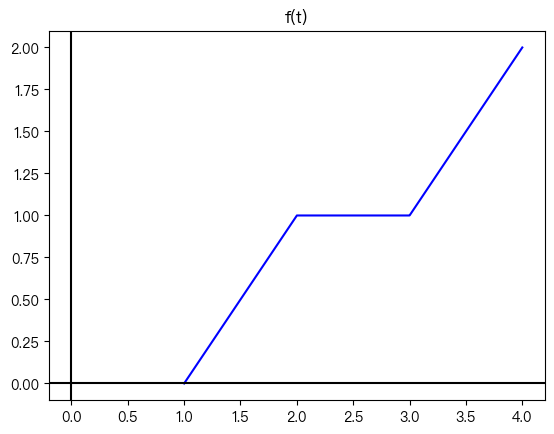

In [2]:
def fun(x,x1,x2):
    if x < x1:
        return x-1
    elif x >= x2:
        return x-2
    else:
        return 1
X = np.linspace(1, 4, 3000)
Y = np.array([fun(t, 2, 3) for t in X])
plt.title(u'f(t)')
plt.plot(X,Y,c='b')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

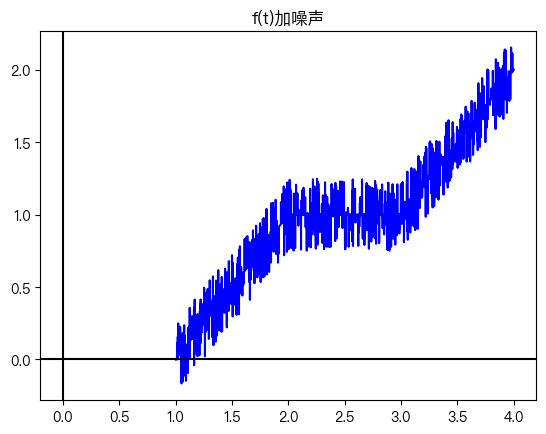

In [3]:
def fun(x,x1,x2):
    if x < x1:
        return x-1
    elif x >= x2:
        return x-2
    else:
        return 1
X = np.linspace(1, 4, 3000)
Y = np.array([fun(t, 2, 3)+random.randint(0, 1)*random.randint(0, 1)*random.uniform(-0.25, 0.25) for t in X])
plt.title(u'f(t)加噪声')
plt.plot(X,Y,c='b')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

In [4]:
def mean_filter(arr, k):
    # applies mean filter to 1-d array with the kernel size 2k+1 . Write your code here
    p=len(arr)
    arr2=np.zeros(2*k+p, dtype=float)
    arr3=np.zeros(2*k+p, dtype=float)
    arr4=np.zeros(p, dtype=float)

    for i in range(p):
        arr2[k+i]=arr[i]

    for i in range(k,k+p):
        sum=0
        for j in range(-k,k+1):
            sum+=arr2[i+j]
        arr3[i]=sum/float(2*k+1)

    for i in range(p):
        arr4[i]=arr3[k+i]

    return arr4

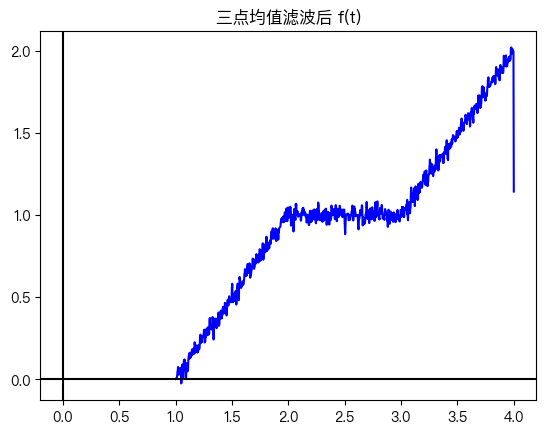

In [5]:
Y_mean_3 = mean_filter(Y, 3)
plt.title(u'三点均值滤波后 f(t)')
plt.plot(X,Y_mean_3,c='b')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

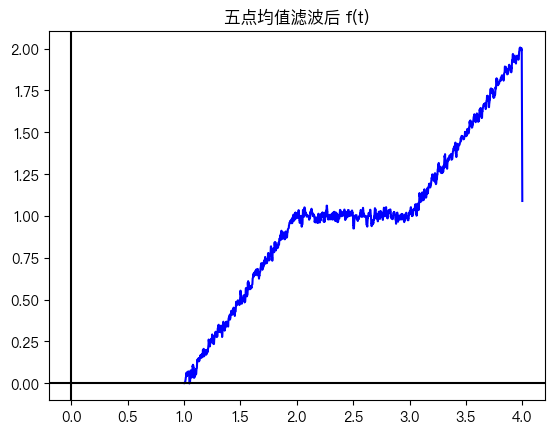

In [6]:
Y_mean_5 = mean_filter(Y, 5)
plt.title(u'五点均值滤波后 f(t)')
plt.plot(X,Y_mean_5,c='b')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

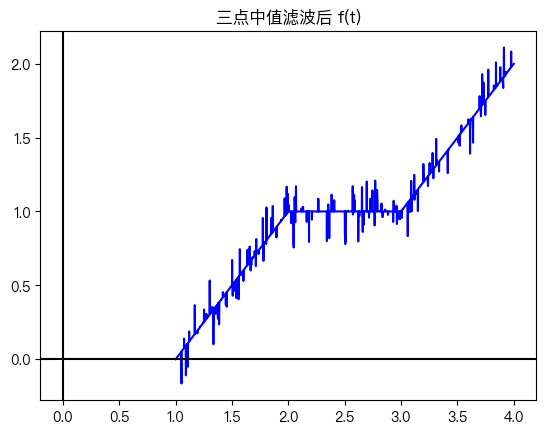

In [7]:
from scipy import signal

Y_med_3 = signal.medfilt(Y, kernel_size=3)
plt.title(u'三点中值滤波后 f(t)')
plt.plot(X,Y_med_3,c='b')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

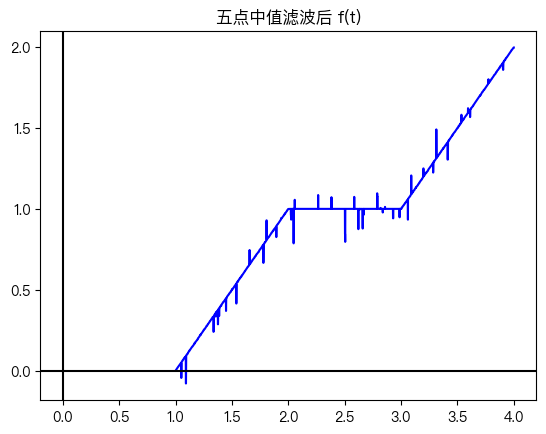

In [8]:
Y_med_5 = signal.medfilt(Y, kernel_size=5)
plt.title(u'五点中值滤波后 f(t)')
plt.plot(X,Y_med_5,c='b')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

# 任务二

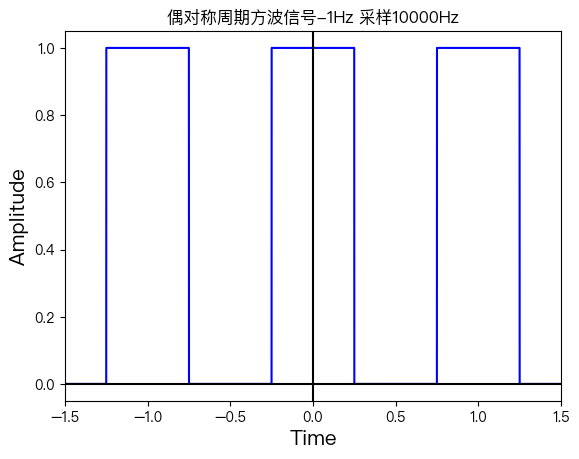

In [9]:
from scipy import signal
N1 = 30000
t = np.linspace(-1.5, 1.5, N1, endpoint=False)
sq = signal.square(2 * np.pi * (t+0.25)) #square函数生成方波
# 方波信号
plt.plot(t, (sq+1)/2, c='b')
plt.xlim(-1.5, 1.5)
plt.title(u'偶对称周期方波信号-1Hz 采样10000Hz')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.ylabel('Amplitude', fontdict={'weight':'normal','size': 15})
plt.xlabel('Time', fontdict={'weight':'normal','size': 15})
plt.show()

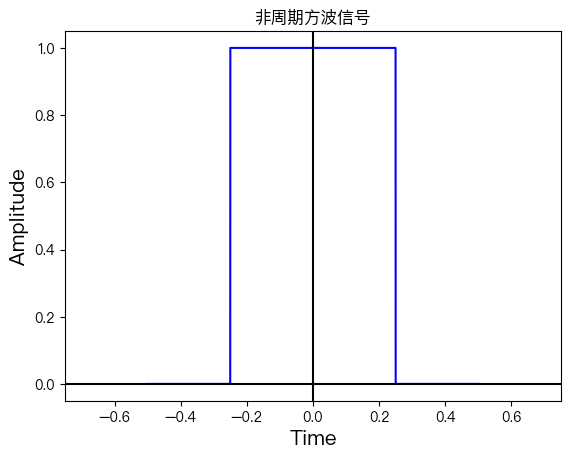

In [10]:
N1 = 30000
t = np.linspace(-0.5, 0.5, N1, endpoint=False)
sq = signal.square(2 * np.pi * (t+0.25)) #square函数生成方波
# 方波信号
plt.plot(t, (sq+1)/2, c='b')
plt.xlim(-0.75, 0.75)
plt.title(u'非周期方波信号')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.ylabel('Amplitude', fontdict={'weight':'normal','size': 15})
plt.xlabel('Time', fontdict={'weight':'normal','size': 15})
plt.show()

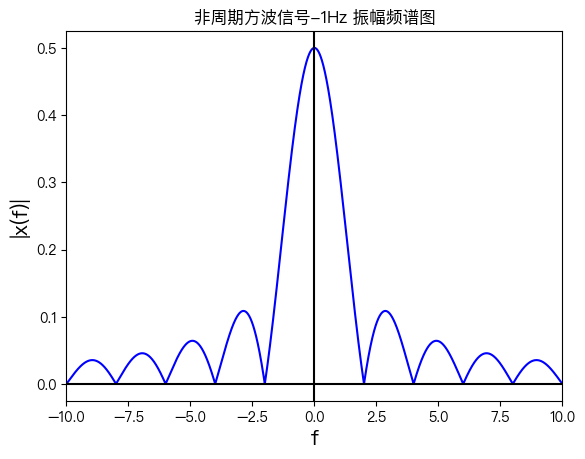

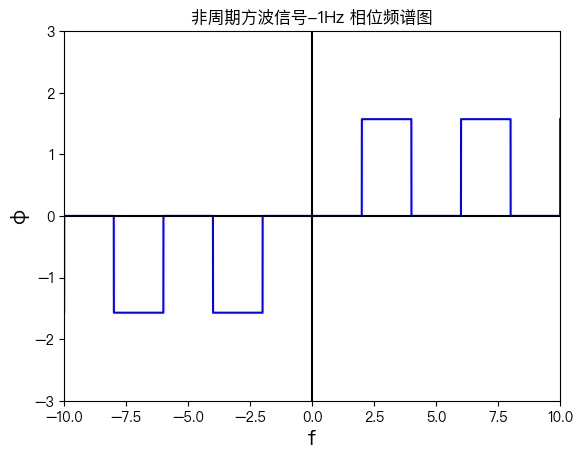

In [11]:
f = []
A = []
for i in range(-20000, 20000):
    f.append(i/2000)
    if i!=0:
        An = abs(math.sin(0.5*math.pi*i/2000)/(math.pi*i/2000))
    else:
        An = 0.5
    A.append(An)

N1 = 150000
t1 = np.linspace(0, 15, N1, endpoint=False)
phi1 = signal.square(1/2 * np.pi * (t1+2))

N1 = 150000
t2 = np.linspace(-15, 0, N1, endpoint=False)
phi2 = signal.square(1/2 * np.pi * (t2))

# 振幅频谱图
plt.plot(f, A, label="all", c='b')
plt.xlim(-10, 10)
plt.axhline(y=0, ls="-", c="k")
plt.axvline(x=0, color='k')
plt.title(u'非周期方波信号-1Hz 振幅频谱图')
plt.ylabel(u'|x(f)|', fontdict={'weight':'normal','size': 15})
plt.xlabel(u'f', fontdict={'weight':'normal','size': 15})
plt.show()

# 复数频谱图
plt.plot(t1, math.pi/4*(phi1+1), label="all", c="b")
plt.plot(t2, -math.pi/4*(phi2+1), label="all", c="b")
plt.xlim(-10, 10)
plt.axhline(y=0, ls="-", c="k")
plt.axvline(x=0, color='k')
plt.title(u'非周期方波信号-1Hz 相位频谱图')
plt.ylabel(u'φ', fontdict={'weight':'normal','size': 15})
plt.xlabel(u'f', fontdict={'weight':'normal','size': 15})
plt.ylim(-3, 3)
plt.show()

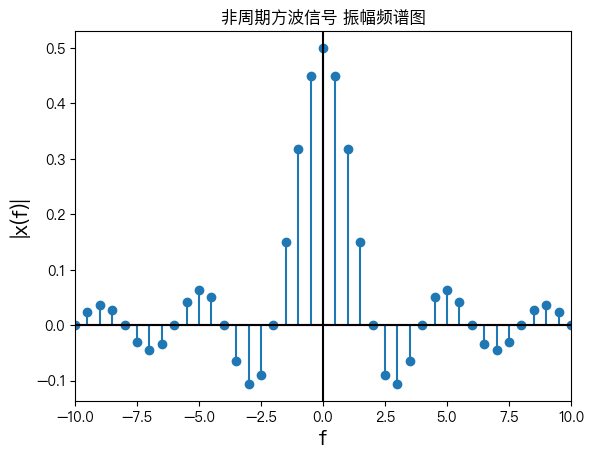

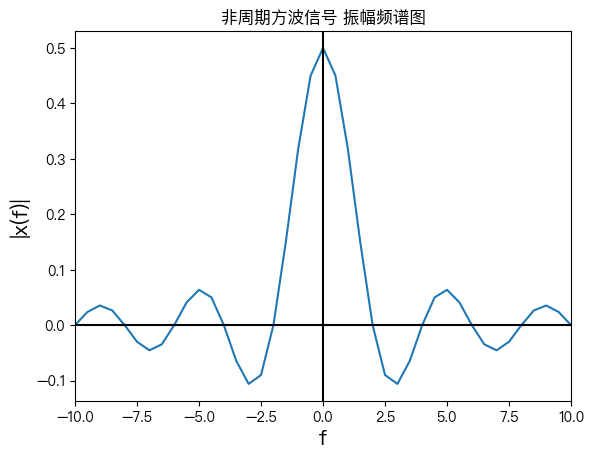

In [12]:
f = []
A = []
for i in range(-1000, 1000):
    f.append(i/2)
    if i!=0:
        An = math.sin(0.5*math.pi*i/2)/(math.pi*i/2)
    else:
        An = 0.5
    A.append(An)

# 振幅频谱图
plt.stem(f, A, label="all")
plt.xlim(-10, 10)
plt.axhline(y=0, ls="-", c="k")
plt.axvline(x=0, color='k')
plt.title(u'非周期方波信号 振幅频谱图')
plt.ylabel(u'|x(f)|', fontdict={'weight':'normal','size': 15})
plt.xlabel(u'f', fontdict={'weight':'normal','size': 15})
plt.show()

plt.plot(f, A, label="all")
plt.xlim(-10, 10)
plt.axhline(y=0, ls="-", c="k")
plt.axvline(x=0, color='k')
plt.title(u'非周期方波信号 振幅频谱图')
plt.ylabel(u'|x(f)|', fontdict={'weight':'normal','size': 15})
plt.xlabel(u'f', fontdict={'weight':'normal','size': 15})
plt.show()

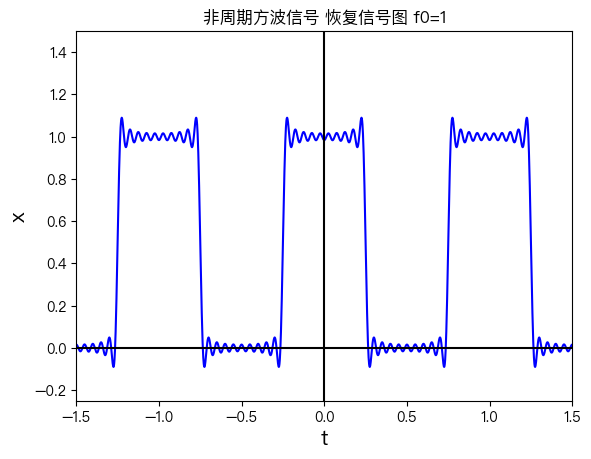

In [13]:
# 取[100, 100], f0 = 1
def x_new(f0, t):
    res = 0
    for i in range(-20, 20):
        if i != 0:
            res = res + math.sin(0.5*math.pi*i*f0)/(math.pi*i*f0) * math.cos(2*math.pi*i*f0*t)
        else:
            res = res + 0.5
    return res*f0

X = []
t = [i/1000 for i in range(-2000,2000)]
f0 = 1
for i in t:
    X.append(x_new(f0, i))

plt.plot(t, X, label="all", c="b")
plt.xlim(-1.5, 1.5)
plt.axhline(y=0, ls="-", c="k")
plt.axvline(x=0, color='k')
plt.title(u'非周期方波信号 恢复信号图 f0=1')
plt.ylabel(u'x', fontdict={'weight':'normal','size': 15})
plt.xlabel(u't', fontdict={'weight':'normal','size': 15})
plt.ylim(-0.25, 1.5)
plt.show()

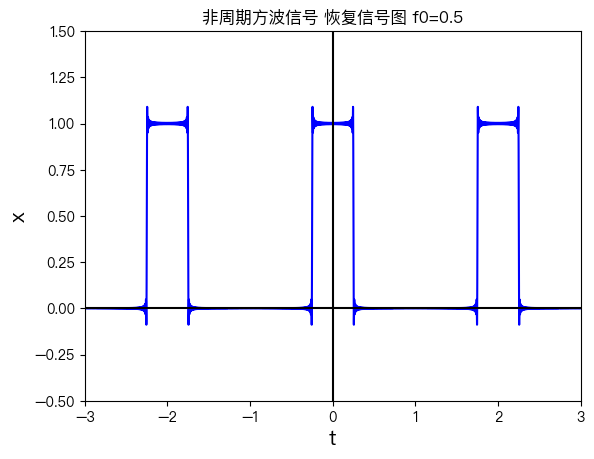

In [14]:
# 取[100, 100], f0 = 0.5
def x_new(f0, t):
    res = 0
    for i in range(-200, 200):
        if i != 0:
            res = res + math.sin(0.5*math.pi*i*f0)/(math.pi*i*f0) * math.cos(2*math.pi*i*f0*t)
        else:
            res = res + 0.5
    return res*f0

X = []
t = [i/1000 for i in range(-5000,5000)]
f0 = 0.5
for i in t:
    X.append(x_new(f0, i))

plt.plot(t, X, label="all", c="b")
plt.xlim(-3, 3)
plt.axhline(y=0, ls="-", c="k")
plt.axvline(x=0, color='k')
plt.title(u'非周期方波信号 恢复信号图 f0=0.5')
plt.ylabel(u'x', fontdict={'weight':'normal','size': 15})
plt.xlabel(u't', fontdict={'weight':'normal','size': 15})
plt.ylim(-0.5, 1.5)
plt.show()

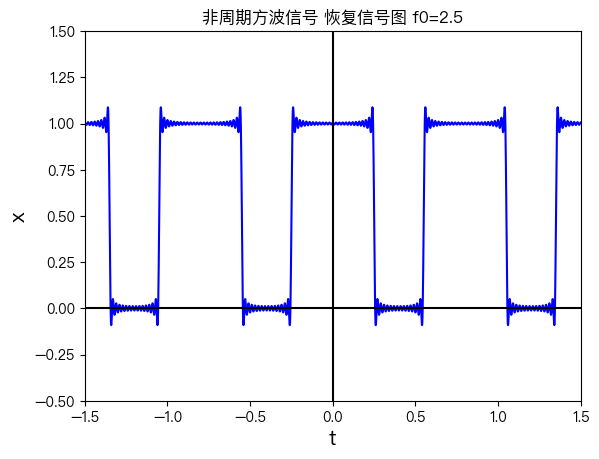

In [15]:
# 取[100, 100], f0 = 2.5
def x_new(f0, t):
    res = 0
    for i in range(-40, 40):
        if i != 0:
            res = res + math.sin(0.5*math.pi*i*f0)/(math.pi*i*f0) * math.cos(2*math.pi*i*f0*t)
        else:
            res = res + 0.5
    return res*f0

X = []
t = [i/1000 for i in range(-2000,2000)]
f0 = 1.25
for i in t:
    X.append(x_new(f0, i))

plt.plot(t, X, label="all", c="b")
plt.xlim(-1.5, 1.5)
plt.axhline(y=0, ls="-", c="k")
plt.axvline(x=0, color='k')
plt.title(u'非周期方波信号 恢复信号图 f0=2.5')
plt.ylabel(u'x', fontdict={'weight':'normal','size': 15})
plt.xlabel(u't', fontdict={'weight':'normal','size': 15})
plt.ylim(-0.5, 1.5)
plt.show()

# 任务三

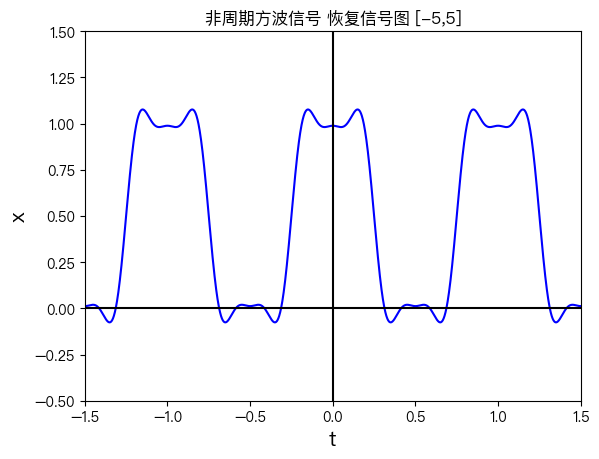

In [16]:
# 取n在[-5, 5]
def x_new(f0, t):
    res = 0
    for i in range(-5, 5):
        if i != 0:
            res = res + math.sin(0.5*math.pi*i*f0)/(math.pi*i*f0) * math.cos(2*math.pi*i*f0*t)
        else:
            res = res + 0.5
    return res*f0

X = []
t = [i/1000 for i in range(-2000,2000)]
f0 = 1
for i in t:
    X.append(x_new(f0, i))

plt.plot(t, X, label="all", c="b")
plt.xlim(-1.5, 1.5)
plt.axhline(y=0, ls="-", c="k")
plt.axvline(x=0, color='k')
plt.title(u'非周期方波信号 恢复信号图 [-5,5]')
plt.ylabel(u'x', fontdict={'weight':'normal','size': 15})
plt.xlabel(u't', fontdict={'weight':'normal','size': 15})
plt.ylim(-0.5, 1.5)
plt.show()

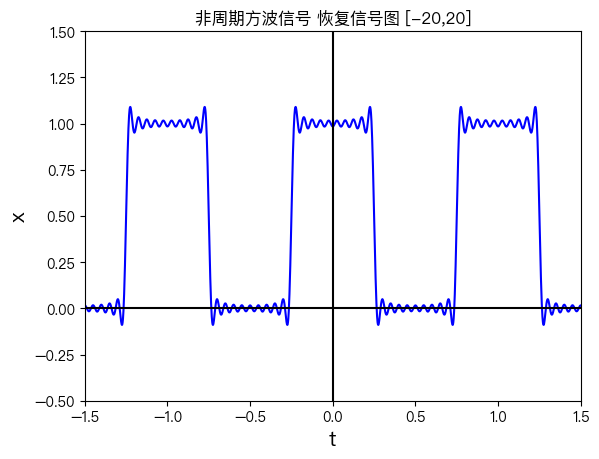

In [17]:
# 取n在[-20, 20]
def x_new(f0, t):
    res = 0
    for i in range(-20, 20):
        if i != 0:
            res = res + math.sin(0.5*math.pi*i*f0)/(math.pi*i*f0) * math.cos(2*math.pi*i*f0*t)
        else:
            res = res + 0.5
    return res*f0

X = []
t = [i/1000 for i in range(-2000,2000)]
f0 = 1
for i in t:
    X.append(x_new(f0, i))

plt.plot(t, X, label="all", c="b")
plt.xlim(-1.5, 1.5)
plt.axhline(y=0, ls="-", c="k")
plt.axvline(x=0, color='k')
plt.title(u'非周期方波信号 恢复信号图 [-20,20]')
plt.ylabel(u'x', fontdict={'weight':'normal','size': 15})
plt.xlabel(u't', fontdict={'weight':'normal','size': 15})
plt.ylim(-0.5, 1.5)
plt.show()

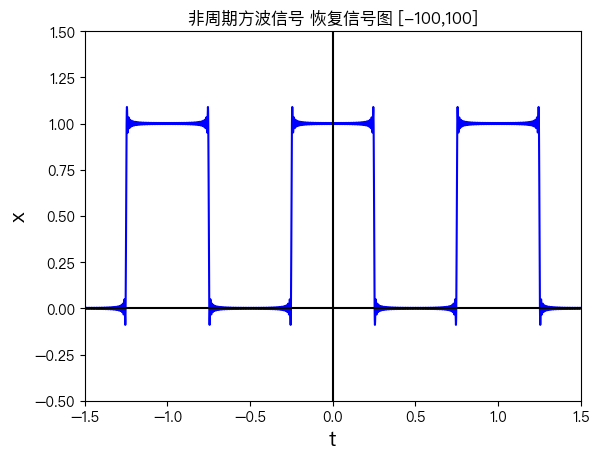

In [18]:
# 取n在[-100, 100]
def x_new(f0, t):
    res = 0
    for i in range(-100, 100):
        if i != 0:
            res = res + math.sin(0.5*math.pi*i*f0)/(math.pi*i*f0) * math.cos(2*math.pi*i*f0*t)
        else:
            res = res + 0.5
    return res*f0

X = []
t = [i/1000 for i in range(-2000,2000)]
f0 = 1
for i in t:
    X.append(x_new(f0, i))

plt.plot(t, X, label="all", c="b")
plt.xlim(-1.5, 1.5)
plt.axhline(y=0, ls="-", c="k")
plt.axvline(x=0, color='k')
plt.title(u'非周期方波信号 恢复信号图 [-100,100]')
plt.ylabel(u'x', fontdict={'weight':'normal','size': 15})
plt.xlabel(u't', fontdict={'weight':'normal','size': 15})
plt.ylim(-0.5, 1.5)
plt.show()